In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

#Statistics / Logistic Regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from scipy import stats

#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Confusion Matrix
from sklearn.metrics import confusion_matrix

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Trees
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Model turning
from sklearn.model_selection import GridSearchCV

RANDOM_STATE=42
%matplotlib inline

In [3]:
credit_original_data = pd.read_csv("creditcard_2023.csv")
credit_original_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [4]:
cc_data = credit_original_data.copy()
cc_data.info()
cc_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28943 entries, 0 to 28942
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28943 non-null  int64  
 1   V1      28943 non-null  float64
 2   V2      28943 non-null  float64
 3   V3      28943 non-null  float64
 4   V4      28943 non-null  float64
 5   V5      28943 non-null  float64
 6   V6      28943 non-null  float64
 7   V7      28943 non-null  float64
 8   V8      28943 non-null  float64
 9   V9      28943 non-null  float64
 10  V10     28943 non-null  float64
 11  V11     28942 non-null  float64
 12  V12     28942 non-null  float64
 13  V13     28942 non-null  float64
 14  V14     28942 non-null  float64
 15  V15     28942 non-null  float64
 16  V16     28942 non-null  float64
 17  V17     28942 non-null  float64
 18  V18     28942 non-null  float64
 19  V19     28942 non-null  float64
 20  V20     28942 non-null  float64
 21  V21     28942 non-null  float64
 22

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28943.000000,28943.000000,28943.000000,28943.000000,28943.000000,28943.000000,28943.000000,28943.000000,28943.000000,28943.000000,...,28942.000000,28942.000000,28942.000000,28942.000000,28942.000000,28942.000000,28942.000000,28942.000000,28942.000000,28942.000000
mean,14471.000000,0.329498,-0.437160,1.066880,-0.633050,0.254194,0.484634,0.443084,-0.136236,0.846925,...,-0.123379,-0.134085,-0.055562,0.143078,0.147727,-0.027353,-0.199456,-0.090712,11957.239181,0.003213
std,8355.268757,0.626109,0.613426,0.715775,0.659786,0.664552,0.725842,0.552567,0.281322,0.907651,...,0.299899,0.575985,0.526239,1.103329,0.709019,1.128015,0.482393,0.671364,6909.049125,0.056596
min,0.000000,-2.637662,-25.480046,-2.518308,-4.468314,-5.182978,-18.642598,-3.038728,-6.595785,-2.170915,...,-10.699713,-6.262872,-19.297443,-4.067968,-10.230967,-3.733169,-5.536809,-24.176384,50.120000,0.000000
25%,7235.500000,-0.147651,-0.599150,0.610056,-0.992890,-0.018165,0.084269,0.248902,-0.188672,0.246928,...,-0.203013,-0.526460,-0.199772,-0.557553,-0.294149,-0.801778,-0.309319,-0.119785,6008.650000,0.000000
50%,14471.000000,0.091171,-0.391517,0.976234,-0.535600,0.166324,0.376462,0.410113,-0.144655,0.663226,...,-0.140278,-0.132086,-0.074382,0.157412,0.195969,-0.115717,-0.228377,-0.051072,11854.120000,0.000000
75%,21706.500000,0.963836,-0.189606,1.466309,-0.181747,0.383896,0.739131,0.598761,-0.085078,1.287258,...,-0.070559,0.223855,0.052573,0.845763,0.604146,0.675184,-0.132106,0.084813,17952.480000,0.000000
max,28942.000000,1.695400,3.368287,4.440555,2.576901,41.540257,9.704313,41.568286,5.958040,12.171681,...,6.834415,6.492043,18.418155,11.029578,10.424231,5.623285,26.944437,11.375357,24039.880000,1.000000


In [5]:
#perform logistic regression using glm (generalized linear model) method
logit_equation = 'Class~V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount'
fit1 = smf.glm(logit_equation, data=cc_data, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                28942
Model:                            GLM   Df Residuals:                    28912
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84.766
Date:                Sun, 29 Sep 2024   Deviance:                       169.53
Time:                        09:20:01   Pearson chi2:                 2.21e+04
No. Iterations:                    14   Pseudo R-squ. (CS):            0.03676
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4517      0.784     -5.677      0.0

In [6]:
# Columns to keep
target_columns = ['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']

# Create a new DataFrame with the selected columns
cc_data = cc_data[target_columns]
cc_data.head()

,id,V1,V2,V3,V4,V5,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,14278.97,0.0


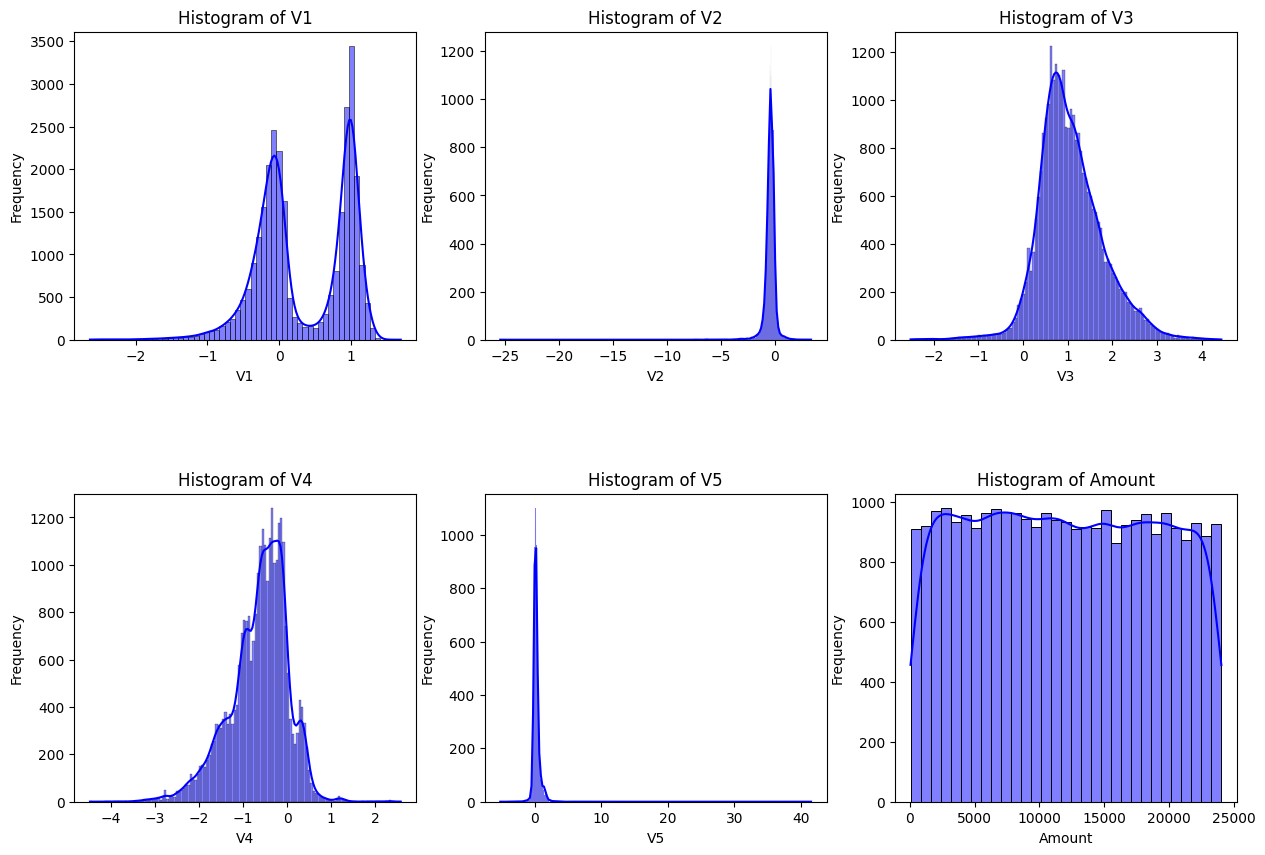

In [7]:
# Define the columns you want to plot
columns_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']

# Create subplots for the histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_to_plot):
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(data=cc_data, x=col, kde=True, color='blue', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Histogram of {col}')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Frequency')

# Remove empty subplots, if any
for i in range(len(columns_to_plot), 2 * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()

<ipython-input-8-b9efb8718125>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=cc_data, palette='Set1')


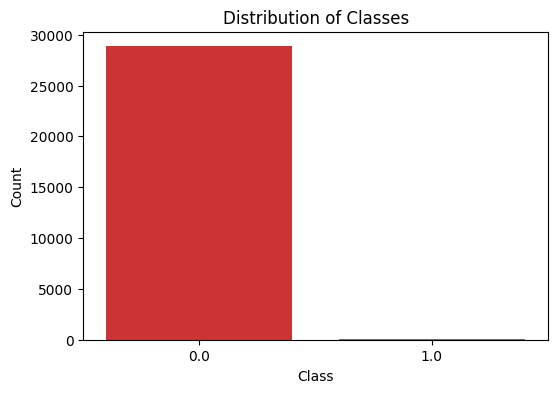

Count of Fraudulent Transactions: 93
Count of Non-Fraudulent Transactions: 28849


In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=cc_data, palette='Set1')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

fraud_count = (cc_data['Class']==1).sum()
nonfraud_count = (cc_data['Class']==0).sum()
print("Count of Fraudulent Transactions:", fraud_count)
print("Count of Non-Fraudulent Transactions:", nonfraud_count)

In [9]:
#perform logistic regression using glm (generalized linear model) method.
#Note, we leave out Amount as it isn't statistically significant
logit_eq = 'Class~V1+V2+V3+V4+V5'
fit1 = smf.glm(logit_eq, data=cc_data, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                28942
Model:                            GLM   Df Residuals:                    28936
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -194.21
Date:                Sun, 29 Sep 2024   Deviance:                       388.42
Time:                        09:21:01   Pearson chi2:                 9.13e+03
No. Iterations:                    12   Pseudo R-squ. (CS):            0.02945
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8721      0.281    -20.874      0.0

In [10]:
#split data into training and validation/test set
train, test = train_test_split(cc_data, test_size=0.2, random_state = 42)

#Fit logistic regression model with training set
fit2 = smf.glm(logit_eq, data=train, family=sm.families.Binomial()).fit()

In [11]:
#Make predictions on the validation set with the new model
predictions = fit2.predict(test)

#Convert predicted probabilities to binary predictions: 1 if prob>0.5
encode = lambda x: 1 if x>=0.5 else 0
predicted = predictions.map(encode)

# compare the predicted values with the actual values in the test set
misclassified = (predicted != test['Class']).sum()

mis_rate = misclassified/len(test)
print("Our model has a misclassifcation rate of:", mis_rate*100, "%")

Our model has a misclassifcation rate of: 0.36275695284159615 %


In [13]:
test_sizes = [0.1, 0.3, 0.5]
#to store the misclassification accuracy score for each model
model_rates = []
#to store the model parameters
model_params = []

#iterate through each test size
for test_size in test_sizes:

    #split data into training and validation sets
    train, test = train_test_split(cc_data, test_size=test_size, random_state = 42)

    #fit the logistic regression model on training set
    model = smf.glm(logit_eq, data=train, family=sm.families.Binomial()).fit()

    #Store model parameters
    model_params.append(model.params)

    #Get predictions on test/validation test
    predicted_probs = model.predict(test)

    #Classifdy predictions on 0.5 threshold
    predicted = predicted_probs.map(encode)

    #Calculate misclassification rate & store rates
    misclassified = (predicted != test['Class']).sum()
    mis_rate = misclassified / len(test)
    model_rates.append(mis_rate)

#Store misclassification rates in designated variables
mis_rate_10, mis_rate_30, mis_rate_50 = model_rates

In [14]:
print(f"Misclassification Rate for 10% Test Size:", mis_rate_10*100, "%")
print(f"Misclassification Rate for 30% Test Size:", mis_rate_30*100, "%")
print(f"Misclassification Rate for 50% Test Size:", mis_rate_50*100, "%")

Misclassification Rate for 10% Test Size: 0.41450777202072536 %
Misclassification Rate for 30% Test Size: 0.2879189220315559 %
Misclassification Rate for 50% Test Size: 0.28330569375345493 %


In [16]:
#Get get original dataset
cc_data = credit_original_data.copy()
cc_data = cc_data.drop(columns = ['id', 'Amount'])

cc_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0.0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,0.0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,0.0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.0


In [17]:
# Calculate pairwise correlations
corr_matrix = cc_data.corr()
# Find the correlation of 'HD' with all predictor variables
corr_HD = corr_matrix['Class']

# Find the predictor with the highest positive correlation
highest_corr = corr_HD.drop('Class').idxmax()

print(f"The feature that has the highest correlation with Credit Card Fraud is: {highest_corr}")

The feature that has the highest correlation with Credit Card Fraud is: V8


In [18]:
X = cc_data.drop('Class', axis=1) # All predictor variables
y = cc_data['Class'] # Target Output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create Bagging Classifier
bag = BaggingClassifier(random_state=42)

# Train Bagging Classifier
bag.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [22]:
# Create Random Forest Classifier
rf = RandomForestClassifier()

#Train rf classifier
rf.fit(X_train, y_train)

RandomForestClassifier()